SECOND APRROACH
ALL FEATURES
Gradient Boosting Evaluation Metrics:
R²   (R-squared):              -0.3453
MSE  (Mean Squared Error):     31465912161608.78
MAPE (Mean Absolute % Error):  50.04%

 Polynomial Regression (All Features, Degree=2)
R²   (R-squared):              -357290.7747
MSE  (Mean Squared Error):     8357134698325957632.00
MAPE (Mean Absolute % Error):  5704.72%

 Linear Regression (All Features)
R²   (R-squared):              -0.1660
MSE  (Mean Squared Error):     27271938218871.29
MAPE (Mean Absolute % Error):  53.20%

 Random Forest (All Features)
R²   (R-squared):              -0.2373
MSE  (Mean Squared Error):     28941047083640.40
MAPE (Mean Absolute % Error):  49.48%

 XGBoost (All Features)
R²   (R-squared):              -0.1194
MSE  (Mean Squared Error):     26183788053661.45
MAPE (Mean Absolute % Error):  43.69%

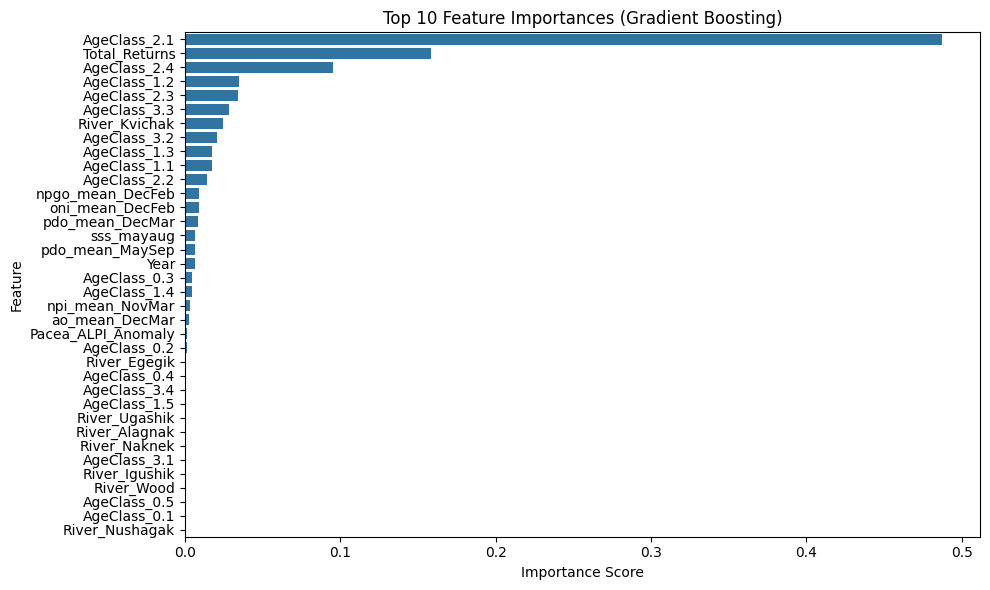

Gradient Boosting Evaluation Metrics:
R²   (R-squared):              -0.3453
MSE  (Mean Squared Error):     31465912161608.78
MAPE (Mean Absolute % Error):  50.04%


In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)

X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']

X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

gbr = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=4, 
    random_state=42
)
# Step 2: Train the model
gbr.fit(X_train, y_train)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a Series with feature importances
feature_importances = pd.Series(gbr.feature_importances_, index=X_train.columns)

# Sort and take top N if needed
top_features = feature_importances.sort_values(ascending=False)


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Feature Importances (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Step 3: Predict on test data
y_pred = gbr.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # In %

# Print results
print("Gradient Boosting Evaluation Metrics:")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

#  Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

#  Step 1: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
feature_names = poly.get_feature_names_out(X_train.columns)

#  Step 2: Train linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

#  Step 3: Predict and evaluate
y_pred = model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#  Step 4: Print metrics
print(" Polynomial Regression (All Features, Degree=2)")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")



 Polynomial Regression (All Features, Degree=2)
R²   (R-squared):              -357290.7747
MSE  (Mean Squared Error):     8357134698325957632.00
MAPE (Mean Absolute % Error):  5704.72%


 Linear Regression (All Features)
R²   (R-squared):              -0.1660
MSE  (Mean Squared Error):     27271938218871.29
MAPE (Mean Absolute % Error):  53.20%


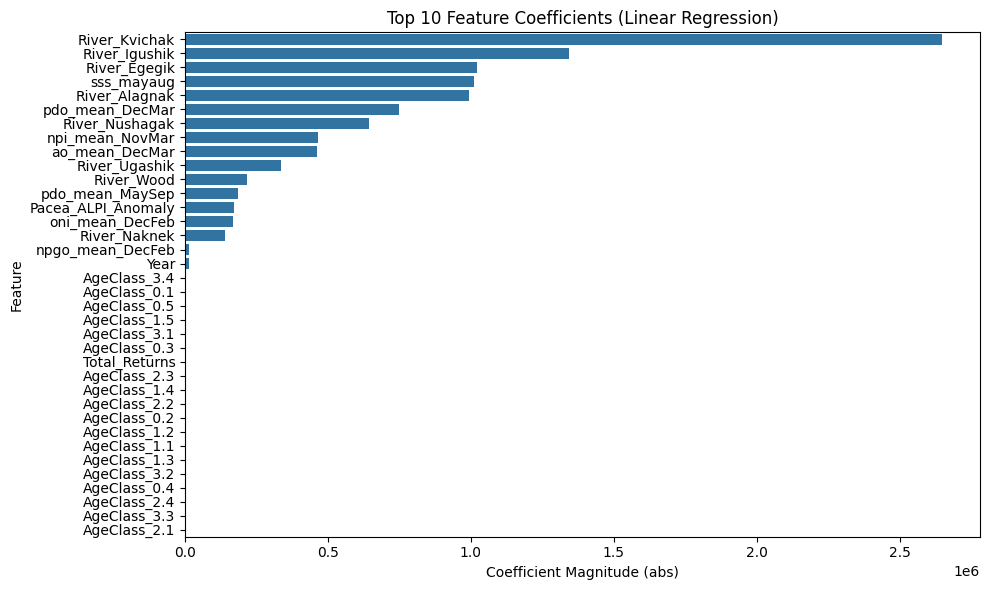

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

#  Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

#  Step 1: Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

#  Step 2: Predict
y_pred = model.predict(X_test)

#  Step 3: Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#  Step 4: Print metrics
print(" Linear Regression (All Features)")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")

#  Step 5: Visualize top 10 coefficients by magnitude
coef_series = pd.Series(np.abs(model.coef_), index=X_train.columns)
top_10_coef = coef_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_coef.values, y=top_10_coef.index)
plt.title("Top 10 Feature Coefficients (Linear Regression)")
plt.xlabel("Coefficient Magnitude (abs)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


 Random Forest (All Features)
R²   (R-squared):              -0.2373
MSE  (Mean Squared Error):     28941047083640.40
MAPE (Mean Absolute % Error):  49.48%


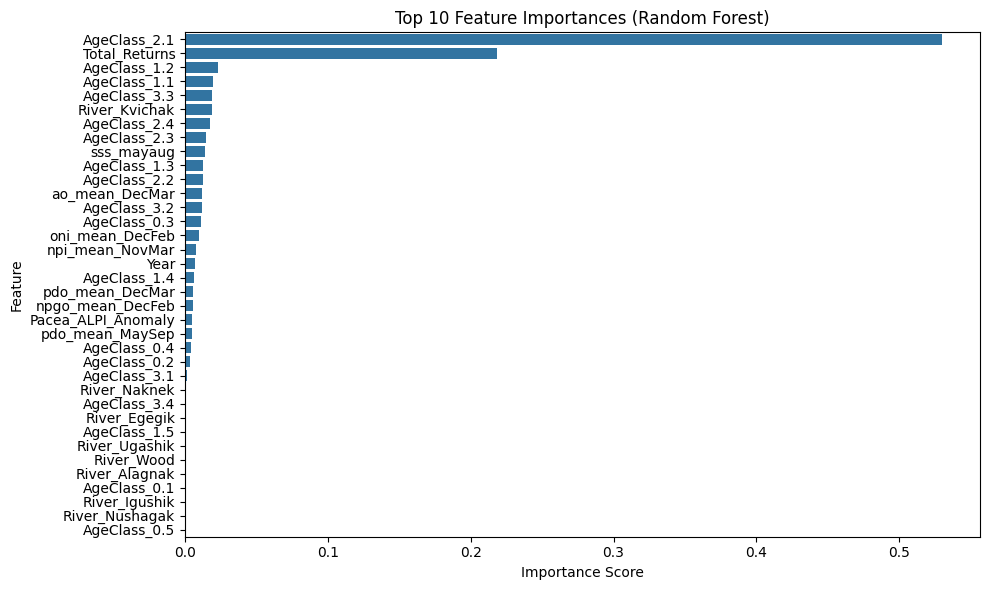

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

#  Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

#  Step 1: Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#  Step 2: Predict
y_pred = rf.predict(X_test)

#  Step 3: Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#  Step 4: Print metrics
print(" Random Forest (All Features)")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")

#  Step 5: Plot top 10 feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_10_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


 XGBoost (All Features)
R²   (R-squared):              -0.1194
MSE  (Mean Squared Error):     26183788053661.45
MAPE (Mean Absolute % Error):  43.69%


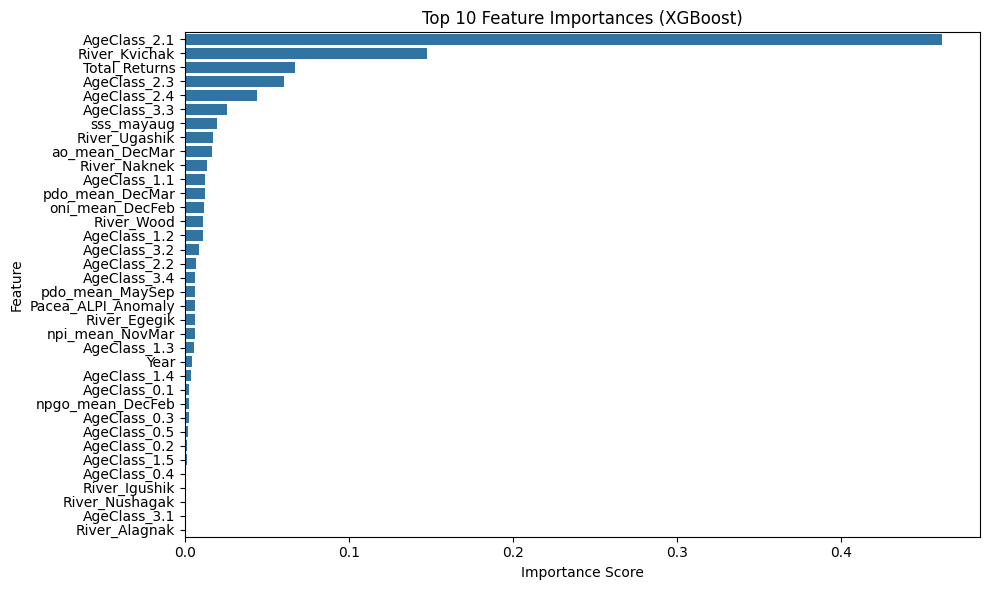

In [2]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

#  Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

#  Step 1: Train XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

#  Step 2: Predict
y_pred = xgb_model.predict(X_test)

#  Step 3: Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#  Step 4: Print results
print(" XGBoost (All Features)")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")

#  Step 5: Plot top 10 feature importances
feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
top_10_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
